# Prodigy Infotech Data Science Internship Task 5

Finding Patterns in Accidents in USA using USA Accidents Dataset and providing insights to reduce the number of accidents and their impact.  
**Citation**: 
* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. "[A Countrywide Traffic Accident Dataset](https://arxiv.org/abs/1906.05409)." (2019).
* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "[Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights](https://arxiv.org/abs/1909.09638)." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

## Introduction

This notebook is part of the Prodigy Infotech Data Science Internship Task 5, which focuses on finding patterns in accidents in the USA. The goal of this task is to analyze accident data and identify any recurring patterns or trends that can help in understanding the causes and factors contributing to accidents.

By examining the available accident data, we aim to gain insights into various aspects such as the time, location, weather conditions, and other factors that may influence the occurrence of accidents. This analysis can be valuable for developing strategies to prevent accidents, improving road safety measures, and making informed decisions to reduce the number of accidents and their impact.

Throughout this notebook, we will explore the accident dataset, perform data cleaning and preprocessing, visualize the data using various charts and graphs, and apply statistical analysis techniques to uncover patterns and correlations. Additionally, we will use machine learning algorithms to predict accident severity based on the available features.

Let's dive into the data and uncover the hidden patterns in accidents in the USA!


## Importing the required libraries

In [3]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


## Importing the dataset

In [2]:
# Importing the dataset
df = pd.read_csv('US_Accidents_March23.csv')

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# Dropping the columns that are not required
df = df.drop(
    [
        "Source",
        "End_Time",
        "End_Lat",
        "End_Lng",
        "Description",
        "Street",
        "County",
        "Zipcode",
        "Country",
        "Timezone",
        "Airport_Code",
        "Weather_Timestamp",
        "Wind_Chill(F)",
        "Wind_Direction",
        "Wind_Speed(mph)",
        "Precipitation(in)",
        "Traffic_Calming",
        "Civil_Twilight",
        "Nautical_Twilight",
        "Astronomical_Twilight",
    ],
    axis=1,
)

In [8]:
df.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),City,State,Temperature(F),Humidity(%),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 05:46:00,39.865147,-84.058723,0.01,Dayton,OH,36.9,91.0,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 06:07:59,39.928059,-82.831184,0.01,Reynoldsburg,OH,37.9,100.0,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:49:27,39.063148,-84.032608,0.01,Williamsburg,OH,36.0,100.0,...,False,False,False,False,False,False,False,True,False,Night
3,A-4,3,2016-02-08 07:23:34,39.747753,-84.205582,0.01,Dayton,OH,35.1,96.0,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,2,2016-02-08 07:39:07,39.627781,-84.188354,0.01,Dayton,OH,36.0,89.0,...,False,False,False,False,False,False,False,True,False,Day


In [10]:
# Checking for null values
df.isnull().sum()

ID                        0
Severity                  0
Start_Time                0
Start_Lat                 0
Start_Lng                 0
Distance(mi)              0
City                    253
State                     0
Temperature(F)       163853
Humidity(%)          174144
Pressure(in)         140679
Visibility(mi)       177098
Weather_Condition    173459
Amenity                   0
Bump                      0
Crossing                  0
Give_Way                  0
Junction                  0
No_Exit                   0
Railway                   0
Roundabout                0
Station                   0
Stop                      0
Traffic_Signal            0
Turning_Loop              0
Sunrise_Sunset        23246
dtype: int64

In [12]:
# Deleting the rows with null city values
df = df.dropna(subset=["City"])

## Date and Time Analysis

In [13]:
# Checking if all Start_Time values are in the same format
df["Start_Time"].str.len().value_counts()

Start_Time
19    6985002
29     682297
26      60842
Name: count, dtype: int64

In [14]:
# Dropping all Start_Time values that are not in the same format as 19
df = df[df["Start_Time"].str.len() == 19]
df.shape

(6985002, 26)

In [15]:
# Splitting Start_Time into date and time
df["Start_Time"] = pd.to_datetime(df["Start_Time"], format="%Y-%m-%d %H:%M:%S")
df["Start_Date"] = df["Start_Time"].dt.date
df["Start_Time"] = df["Start_Time"].dt.time

In [17]:
# Converting Start_Time to hours only
df["Start_Time"] = df["Start_Time"].astype(str).str[:2]
df["Start_Time"] = df["Start_Time"].astype(int)

In [18]:
df["Start_Time"].value_counts()

Start_Time
7     546768
8     541625
16    520166
17    516614
15    463382
14    394688
18    390602
6     375164
13    352355
9     334056
11    322204
12    316899
10    313615
19    267033
5     209549
20    201880
21    169498
4     149070
22    148600
23    110425
0      98447
1      85741
2      82393
3      74228
Name: count, dtype: int64

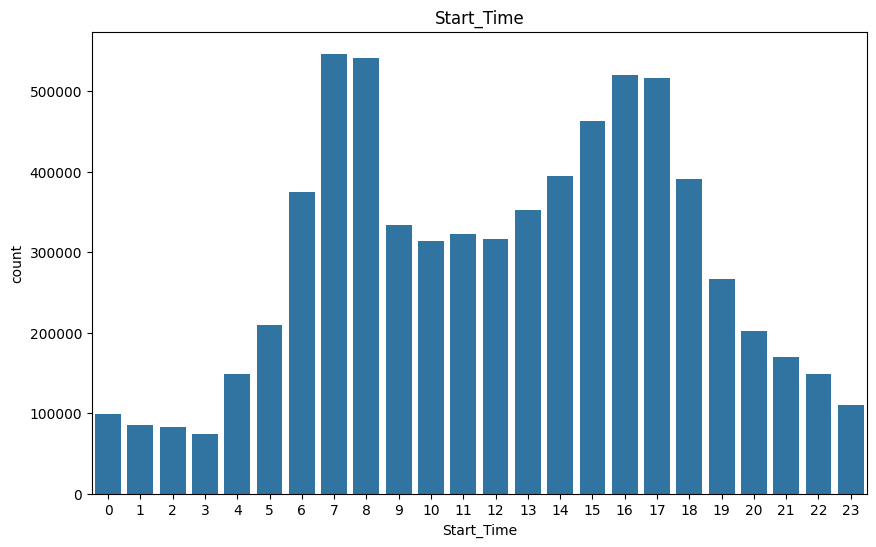

In [19]:
# Visualizing the Start_Time column
plt.figure(figsize=(10, 6))
sns.countplot(x="Start_Time", data=df)
plt.title("Start_Time")
plt.show()

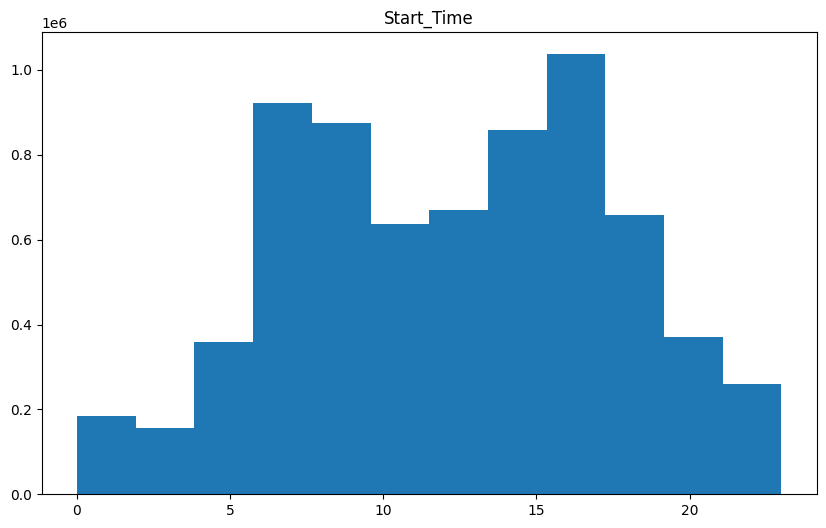

In [20]:
# Using Histogram to visualize the Start_Time column
plt.figure(figsize=(10, 6))
plt.hist(df["Start_Time"], bins=12)
plt.title("Start_Time")
plt.show()

We can see that Majority of the accidents happened during the day time and the least number of accidents happened during the night time.

In [21]:
# Let us split date into year, month and day
df["Start_Date"] = pd.to_datetime(df["Start_Date"])
df["Start_Year"] = df["Start_Date"].dt.year
df["Start_Month"] = df["Start_Date"].dt.month
df["Start_Day"] = df["Start_Date"].dt.day


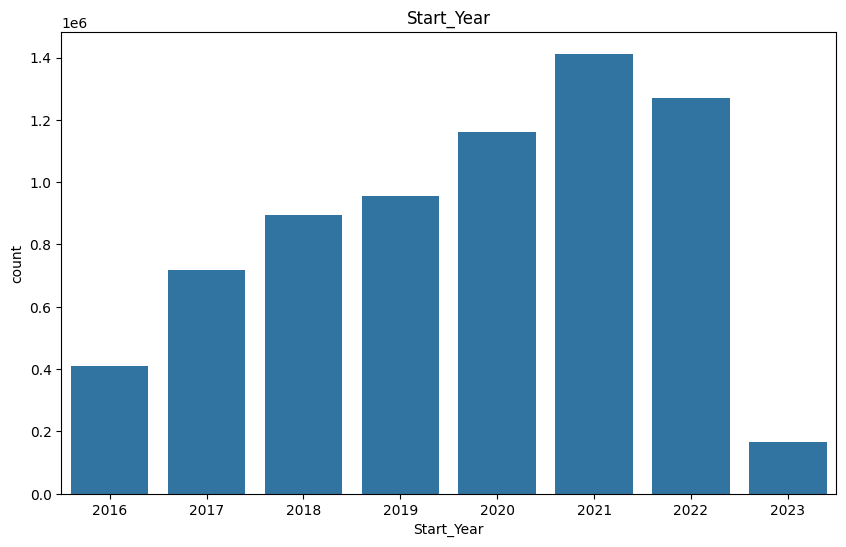

In [22]:
# Visualizing the Year columns
plt.figure(figsize=(10, 6))
sns.countplot(x="Start_Year", data=df)
plt.title("Start_Year")
plt.show()

We can See that the number of accidents are increasing by the year. (2023 has few because the data is only till March 2023)

<Axes: xlabel='Start_Month'>

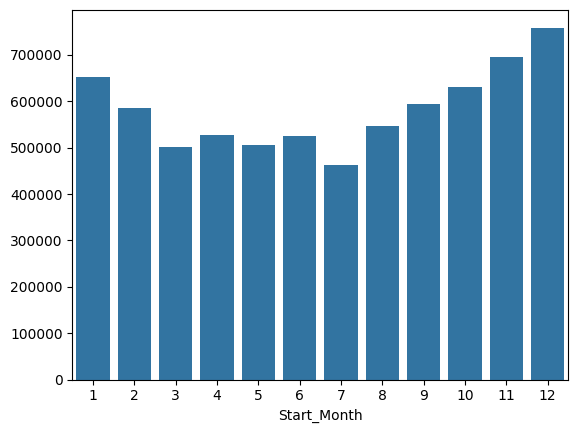

In [25]:
# Visualizing the Month columns
months = df["Start_Month"].value_counts()
months = months.sort_index()
sns.barplot(x=months.index, y=months.values)

We can See Majority of accidents are Concentrated around December and January probably due to Christmas and New Year Celebrations.

<Axes: xlabel='Start_Day'>

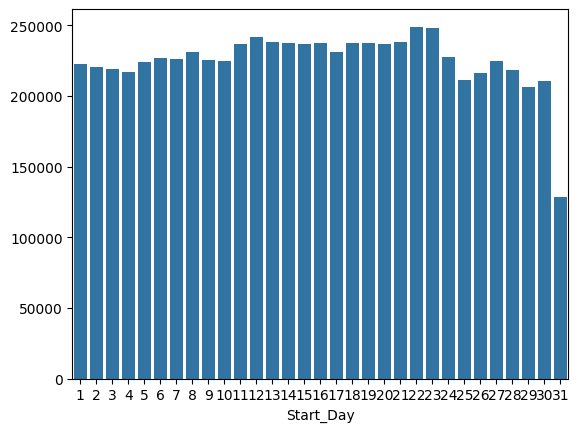

In [26]:
days = df["Start_Day"].value_counts()
days = days.sort_index()
sns.barplot(x=days.index, y=days.values)

We can see that the number of accidents are almost the same on all days of the month. (31 is less since it is not present in all months)

## State-wise Analysis

<Axes: xlabel='State'>

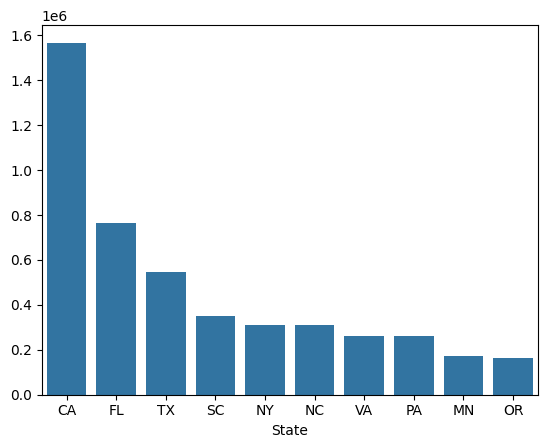

In [30]:
# Visualize State column
top_10_states = df["State"].value_counts()[:10]
sns.barplot(x=top_10_states.index, y=top_10_states.values)

The State CA Corresponds to California and it has the highest number of accidents. Followed by TX (Texas) and FL (Florida).

### Lets look at the cities with the highest number of accidents in california

In [ ]:
# Cities with highest number of accidents in CA
df_CA = df[df["State"] == "CA"]
top_10_cities = df_CA["City"].value_counts()[:10]
sns.barplot(x=top_10_cities.index, y=top_10_cities.values)
plt.xticks(rotation=45)

Majority of the accidents in California are concentrated around Los Angeles, San Diego and San Jose.

## City-wise Analysis

<Axes: ylabel='City'>

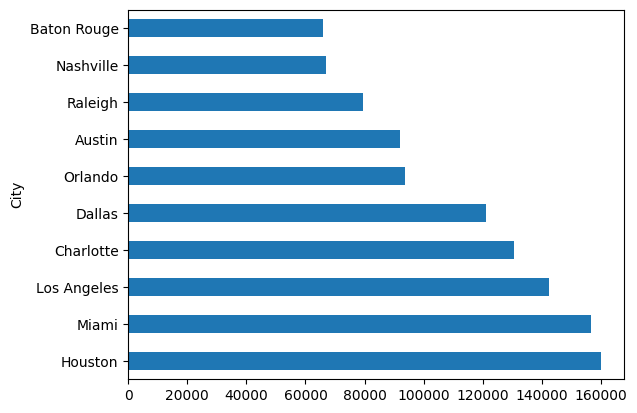

In [32]:
# All Cities with highest number of accidents
top_10_cities = df["City"].value_counts()[:10]
# Horizontal barplot
top_10_cities.plot(kind="barh")

Majority of the accidents are concentrated over the cities of Houston, Miami, Los Angeles, Charlotte and Dallas.

### Daywise Analysis

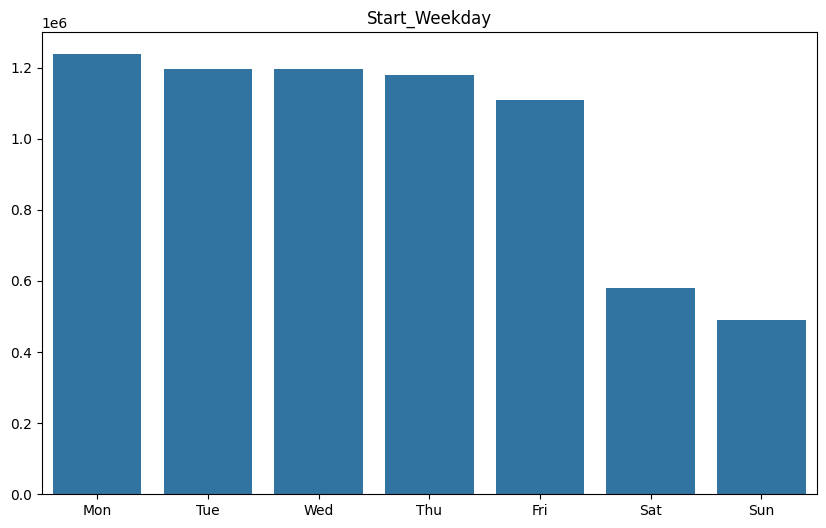

In [38]:
# Converting Date to Day of the week
df["Start_Date"] = pd.to_datetime(df["Start_Date"])
df["Start_Weekday"] = df["Start_Date"].dt.weekday
# Plotting the graph for Start_Weekday using barplot
days = df["Start_Weekday"].value_counts()
day_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(10, 6))
sns.barplot(x=day_labels, y=days.values)
plt.title("Start_Weekday")
plt.show()

The Accidents are less on Saturdays and Sundays. This is probably because people tend to stay at home on weekends.

## Weather Analysis

In [39]:
# Dropping Temperaturea, Humidity, Pressure Columns
df = df.drop(["Temperature(F)", "Humidity(%)", "Pressure(in)"], axis=1)

Text(0.5, 1.0, 'Weather_Condition')

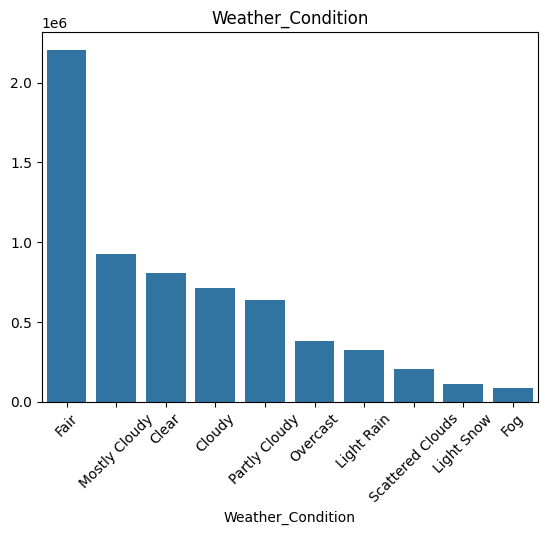

In [42]:
# Plotting Graph for Weather_Condition
weather = df["Weather_Condition"].value_counts()[:10]
sns.barplot(x=weather.index, y=weather.values)
plt.xticks(rotation=45)
plt.title("Weather_Condition")

Although most accidents occured during Fair weather, the number of accidents during other worse weather conditions like Cloudy and Rainy are also significant.

## Visibility

<Axes: xlabel='count', ylabel='Count'>

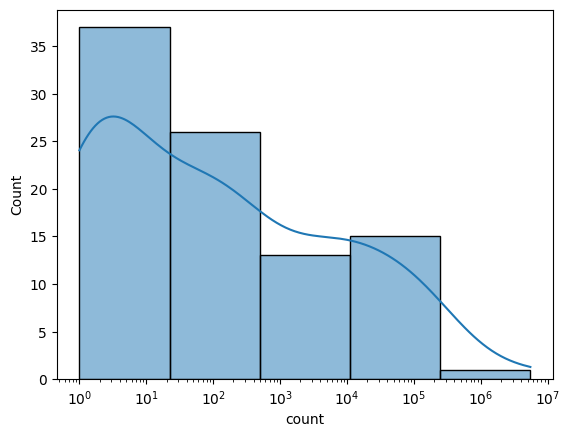

In [48]:
# Visibility
sns.histplot(df["Visibility(mi)"].value_counts(), bins=5, kde=True, log_scale=True)

Majority of the accidents occured when the visibility was less than 10 miles.

## Places of Interaction with the Road or other Vehicles

The Features that are most correlated with the severity of an accident are:
Bump                      
Crossing                  
Give_Way                  
Junction                  
No_Exit                   
Railway                   
Roundabout                
Station                   
Stop                      
Traffic_Signal
Turning_Loop

We will be combining these features into a single feature called "Interaction" which will be 1 if any of the above features are 1 and 0 otherwise.

In [49]:
# Combining the above features into Interaction
df["Interaction"] = (
    df["Bump"]
    + df["Crossing"]
    + df["Give_Way"]
    + df["Junction"]
    + df["No_Exit"]
    + df["Railway"]
    + df["Roundabout"]
    + df["Station"]
    + df["Stop"]
    + df["Traffic_Signal"]
    + df["Turning_Loop"]
)
df["Interaction"].value_counts()

Interaction
False    4878792
True     2106210
Name: count, dtype: int64

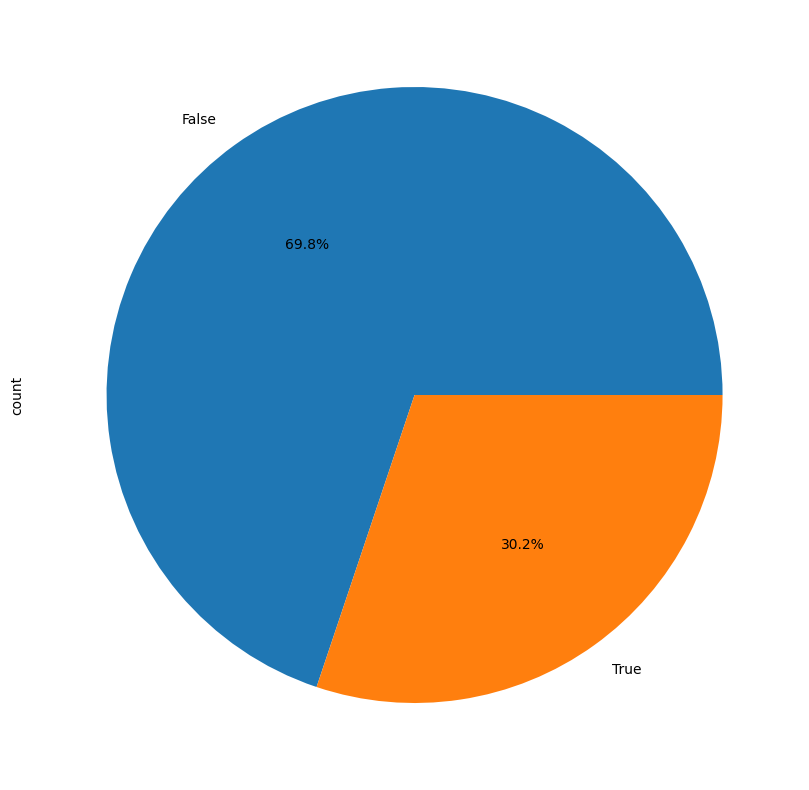

In [50]:
# plotting Interaction Pir chart
plt.figure(figsize=(10, 10))
df["Interaction"].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

As We can see Majority of the accidents happen when there is no interaction with the road or other vehicles.
Therefore we can Avoid accidents by forcing people to interact with the road or other vehicles more often using speed breakers, traffic signals etc.

## Conclusion

In this notebook, we conducted a comprehensive analysis of road accidents in the USA. We explored various aspects such as date and time analysis, state-wise analysis, city-wise analysis, weather analysis, visibility, and places of interaction with the road or other vehicles.

Some key findings from our analysis include:

- Majority of the accidents occurred during the day time, with the highest number of accidents happening between 8 am to 6 pm.
- The number of accidents has been increasing over the years, with California having the highest number of accidents followed by Texas and Florida.
- December and January have the highest number of accidents, possibly due to holiday celebrations.
- Houston, Miami, Los Angeles, Charlotte, and Dallas are the cities with the highest number of accidents.
- Accidents are less frequent on weekends, indicating that people tend to stay at home during weekends.
- Fair weather conditions have the highest number of accidents, but accidents also occur during cloudy and rainy weather.
- Most accidents occur when visibility is less than 10 miles.
- The majority of accidents happen when there is no interaction with the road or other vehicles.

Based on these findings, we can make several recommendations to improve road safety and reduce the number of accidents:

1. Increase awareness and enforcement of road safety measures during peak hours, especially between 8 am to 6 pm.
2. Implement targeted road safety campaigns during December and January to reduce accidents during holiday celebrations.
3. Focus on improving road infrastructure and traffic management in cities with high accident rates, such as Houston, Miami, Los Angeles, Charlotte, and Dallas.
4. Enhance visibility on roads during adverse weather conditions by implementing better lighting systems and road signage.
5. Promote safe driving practices and educate drivers about the importance of maintaining a safe distance and adjusting speed based on visibility conditions.
6. Implement measures to encourage interaction with the road or other vehicles, such as speed breakers, traffic signals, and roundabouts.

By implementing these recommendations, we can work towards reducing the number of accidents, improving road safety, and ultimately saving lives.

This analysis provides valuable insights into the patterns and factors contributing to road accidents in the USA. It can serve as a foundation for further research and the development of targeted interventions to prevent accidents and improve road safety measures.
